In [1]:
# DataFra,es are a great data structure to represent CSV's


In [2]:
import pandas as pd

In [6]:
cd onedrive/udacity/lesson 3

C:\Users\ElPanda\onedrive\udacity\lesson 3


In [8]:
df = pd.read_csv('nyc_subway_weather.csv')



,UNIT,DATEn,TIMEn,ENTRIESn,EXITSn,ENTRIESn_hourly,EXITSn_hourly,datetime,hour,day_week,...,pressurei,rain,tempi,wspdi,meanprecipi,meanpressurei,meantempi,meanwspdi,weather_lat,weather_lon
0,R003,05-01-11,00:00:00,4388333,2911002,0.0,0.0,2011-05-01 00:00:00,0,6,...,30.22,0,55.9,3.5,0.0,30.258,55.98,7.86,40.700348,-73.887177
1,R003,05-01-11,04:00:00,4388333,2911002,0.0,0.0,2011-05-01 04:00:00,4,6,...,30.25,0,52.0,3.5,0.0,30.258,55.98,7.86,40.700348,-73.887177
2,R003,05-01-11,12:00:00,4388333,2911002,0.0,0.0,2011-05-01 12:00:00,12,6,...,30.28,0,62.1,6.9,0.0,30.258,55.98,7.86,40.700348,-73.887177
3,R003,05-01-11,16:00:00,4388333,2911002,0.0,0.0,2011-05-01 16:00:00,16,6,...,30.26,0,57.9,15.0,0.0,30.258,55.98,7.86,40.700348,-73.887177
4,R003,05-01-11,20:00:00,4388333,2911002,0.0,0.0,2011-05-01 20:00:00,20,6,...,30.28,0,52.0,10.4,0.0,30.258,55.98,7.86,40.700348,-73.887177


Calculate Correlation (pearsons R)
=======================================

Pearson's r:
========================

- First standardize each variable
- Multiply each pair of values, and take the average

r = average of (x in std units) x (y in std units)

 ##       Use (var.std(ddof=0)

# Quiz

In [12]:
import pandas as pd

df = pd.read_csv('nyc_subway_weather.csv')

In [18]:
# This is pearson's R, but there is also a Numpy function
def correlation(x, y):
    std_x = (x - x.mean()) / x.std(ddof=0)
    std_y = (y - y.mean()) / y.std(ddof=0)
    
    return (std_x * std_y).mean()

In [19]:
correlation(df['ENTRIESn_hourly'], df['meanprecipi'])

0.03564851577223041

What does this even mean???
============================

When precipitation is higher, subway usage is higher (people are dont want to walk in the rain)
     - Weak relationship

In [23]:
correlation(df['ENTRIESn_hourly'], df['ENTRIESn'])

0.5858954707662182

# Pandas Axis Names

Instea of axis = 0 or axis = 1, you can use axis = 'index' or axis = 'columns'

Data Frama Vectorized Operations
==================================

Similiar to vectorized operations for 2d numpy arrays.
Match up elembents by index and column name rather than poistion.


# Quiz

In [24]:
entries_and_exits = pd.DataFrame({
    'ENTRIESn': [3144312, 3144335, 3144353, 3144424, 3144594,
                 3144808, 3144895, 3144905, 3144941, 3145094],
    'EXITSn': [1088151, 1088159, 1088177, 1088231, 1088275,
               1088317, 1088328, 1088331, 1088420, 1088753]
})

In [30]:
entries_and_exits.shift(1)

,ENTRIESn,EXITSn
0,NaN,NaN
1,3144312.0,1088151.0
2,3144335.0,1088159.0
3,3144353.0,1088177.0
4,3144424.0,1088231.0
5,3144594.0,1088275.0
6,3144808.0,1088317.0
7,3144895.0,1088328.0
8,3144905.0,1088331.0
9,3144941.0,1088420.0


In [31]:
def get_hourly_entries_and_exits(entires_and_exits):
    return entries_and_exits - entires_and_exits.shift(1)

In [32]:
get_hourly_entries_and_exits(entries_and_exits)

,ENTRIESn,EXITSn
0,NaN,NaN
1,23.0,8.0
2,18.0,18.0
3,71.0,54.0
4,170.0,44.0
5,214.0,42.0
6,87.0,11.0
7,10.0,3.0
8,36.0,89.0
9,153.0,333.0


# Non-Built-in Functions for dataframes

### (applymap) function

In [63]:
# ex: def clean_state(s):
 #       df.applymap(clean_state)

# Quiz

In [64]:
import pandas as pd

grades_df = pd.DataFrame(
    data={'exam1': [43, 81, 78, 75, 89, 70, 91, 65, 98, 87],
          'exam2': [24, 63, 56, 56, 67, 51, 79, 46, 72, 60]},
    index=['Andre', 'Barry', 'Chris', 'Dan', 'Emilio', 
           'Fred', 'Greta', 'Humbert', 'Ivan', 'James'])

In [65]:
def convert_grade(grade):
    if grade >= 90:
        return 'A'
    elif grade >= 80:
        return 'B'
    elif grade >= 70:
        return 'C'
    elif grade >= 60:
        return 'D'
    else:
        return 'F'

In [66]:

convert_grade(4)
# Checking a random value to see if correct


'F'

# This is where I use the APPLYMAP function

In [67]:
def convert_grades(grades):
    return grades.applymap(convert_grade)

In [68]:
convert_grades(grades_df)

,exam1,exam2
Andre,F,F
Barry,B,D
Chris,C,F
Dan,C,F
Emilio,B,D
Fred,C,F
Greta,A,C
Humbert,D,F
Ivan,A,C
James,B,D


In [78]:
convert_grades(grades_df)['exam1']

Andre      F
Barry      B
Chris      C
Dan        C
Emilio     B
Fred       C
Greta      A
Humbert    D
Ivan       A
James      B
Name: exam1, dtype: object

# DataFreme apply()

df.apply(f) applies your function to each cell

Ex. Grading on a curve 
    1. Giving top 20% an A
    2. B - 30%
    3. C - 30%
    4. D - 10%
    5. F - 10%
    
apply also takes the axis argumnents (specific one in this case)    
    

# Quiz

In [94]:
grades_df = pd.DataFrame(
    data={'exam1': [43, 81, 78, 75, 89, 70, 91, 65, 98, 87],
          'exam2': [24, 63, 56, 56, 67, 51, 79, 46, 72, 60]},
    index=['Andre', 'Barry', 'Chris', 'Dan', 'Emilio', 
           'Fred', 'Greta', 'Humbert', 'Ivan', 'James']
)


In [95]:
def standardize_column(column):
    return (column - column.mean()) / column.std()

In [ ]:
standardize_column(grades_df['exam1'])

In [102]:
def standardize(df):
    return df.apply(standardize_column)

In [103]:
standardize(grades_df)

,exam1,exam2
Andre,-2.196525,-2.186335
Barry,0.208891,0.366571
Chris,0.018990,-0.091643
Dan,-0.170911,-0.091643
Emilio,0.715295,0.628408
Fred,-0.487413,-0.418938
Greta,0.841896,1.413917
Humbert,-0.803916,-0.746234
Ivan,1.284999,0.955703
James,0.588694,0.170194


# Case 2

 - Instead creating a new DF, you can create a new series

In [122]:
df = pd.DataFrame({
    'a': [4, 5, 3, 1, 2],
    'b': [20, 10, 40, 50, 30],
    'c': [25, 20, 5, 15, 10]    
    })

In [129]:
def second_largest_in_column(column):
    sorted_column = column.sort_values(ascending=False)
    return sorted_column.iloc[1]


# PANDAS SORT

In [130]:
second_largest_in_column(df['a'])

4

In [131]:
def second_largest(df):
    return df.apply(second_largest_in_column)

In [132]:
second_largest(df)

a     4
b    40
c    20
dtype: int64

Adding a DataFrame to a series
================================

In [134]:
import pandas as pd

# Change False to True for each block of code to see what it does

# Adding a Series to a square DataFrame
s = pd.Series([1, 2, 3, 4])
df = pd.DataFrame({
        0: [10, 20, 30, 40],
        1: [50, 60, 70, 80],
        2: [90, 100, 110, 120],
        3: [130, 140, 150, 160]
    })
    
    
 

In [135]:
df

,0,1,2,3
0,10,50,90,130
1,20,60,100,140
2,30,70,110,150
3,40,80,120,160


In [137]:
s

0    1
1    2
2    3
3    4
dtype: int64

In [138]:
df+s

,0,1,2,3
0,11,52,93,134
1,21,62,103,144
2,31,72,113,154
3,41,82,123,164


In [144]:
s = pd.Series([1, 2, 3, 4,])
df = pd.DataFrame({0: [10], 1: [20], 2: [30], 3: [40]})

In [145]:
df + s

,0,1,2,3
0,11,22,33,44


### What will happen to a series if I add a series to a DF?



In [149]:
s = pd.Series([1, 2, 3, 4,])
df = pd.DataFrame({0: [10, 20, 30, 40]})

In [154]:
df + s

,0,1,2,3
0,11,NaN,NaN,NaN
1,21,NaN,NaN,NaN
2,31,NaN,NaN,NaN
3,41,NaN,NaN,NaN


In [156]:
df.add(s, axis='columns')

,0,1,2,3
0,11,NaN,NaN,NaN
1,21,NaN,NaN,NaN
2,31,NaN,NaN,NaN
3,41,NaN,NaN,NaN


In [157]:
df.add(s, axis='index')

,0
0,11
1,22
2,33
3,44


In [164]:
s = pd.Series([1, 2, 3, 4], index=[ 'b', 'c', 'd', 'e'])

df = pd.DataFrame({
    'a': [10, 20, 30, 40],
    'b': [50, 60, 70, 80],
    'c': [90, 100, 110, 120],
    'd': [130, 140, 150, 160]   
    })

In [165]:
df + s

,a,b,c,d,e
0,NaN,51.0,92.0,133.0,NaN
1,NaN,61.0,102.0,143.0,NaN
2,NaN,71.0,112.0,153.0,NaN
3,NaN,81.0,122.0,163.0,NaN


Standardizing Each Column Again
=====================================


Stadardize each column without using apply()

use Vectorized operations

standarize each row 

In [166]:
import pandas as pd

grades_df = pd.DataFrame(
        data={'exam1': [43, 81, 78, 75, 89],
              'exam2': [24, 63, 56, 56, 67]},
        index=['Andre', 'Barry', 'Chris', 'Dan', 'Emilio'])

In [168]:
# take a look at original df

grades_df

,exam1,exam2
Andre,43,24
Barry,81,63
Chris,78,56
Dan,75,56
Emilio,89,67


In [167]:
grades_df.mean()

exam1    73.2
exam2    53.2
dtype: float64

In [170]:
# in order to standardize each column, I have to subtract the mean of each column from that column.
grades_df - grades_df.mean()



,exam1,exam2
Andre,-30.2,-29.2
Barry,7.8,9.8
Chris,4.8,2.8
Dan,1.8,2.8
Emilio,15.8,13.8


## Divide e/ column by its corresponding std deviation

In [172]:
(grades_df - grades_df.mean()) / grades_df.std() 

,exam1,exam2
Andre,-1.709191,-1.718539
Barry,0.441447,0.576770
Chris,0.271659,0.164791
Dan,0.101872,0.164791
Emilio,0.894212,0.812186


In [174]:
# Take the mean along each column, will give mean of each row
grades_df.mean(axis='columns')


Andre     33.5
Barry     72.0
Chris     67.0
Dan       65.5
Emilio    78.0
dtype: float64

In [176]:
# sub function will allow me to subtract each column to each grade_df.mean # uniformly.
mean_diffs = grades_df.sub(grades_df.mean(axis='columns'), axis='index')


In [181]:
# Take the standard deviation of the grades column(axis=column so u get std of each row)
#  Then use mean_diffs.div to divide the std series
# Then use axis='index' to match elements bawsed on row indexes
mean_diffs.div(grades_df.std(axis='columns'), axis='index')
# If the operation is common, you usually don't need to specify an axis
# HOWEVER... If you are standardizing, then you are going to have to specify non-default axis all over the place

,exam1,exam2
Andre,0.707107,-0.707107
Barry,0.707107,-0.707107
Chris,0.707107,-0.707107
Dan,0.707107,-0.707107
Emilio,0.707107,-0.707107


# Ridership By hour of day

### Group data by 
    - hour od day
    - rain
    - day of week

    

In [190]:
import pandas as pd

engagement_df = pd.DataFrame({
    'account_key': ['1200', '1200', '1200', '1200', '1200',
                    '1200', '1200', '1175', '1175', '1175',
                    '1175', '1175', '1175', '1175'],   
    'utc_date': ['2015-03-04', '2015-03-05', '2015-03-06', '2015-03-07',
                 '2015-03-08', '2015-03-09', '2015-03-10', '2015-04-02',
                 '2015-04-03', '2015-04-04', '2015-04-05', '2015-04-06',
                 '2015-04-07', '2015-04-08'],
    'total_minutes_visited': [114.9, 43.4, 187.8, 150.1, 191.6, 0, 8.8,
                              2.7, 0, 0, 0, 0, 0, 0,]    
    })

In [193]:
# will explain what this function does
engagement_df.groupby('account_key').sum()['total_minutes_visited'].mean()

349.65000000000003

In [195]:
# 1st : smaller dictionary mapping e/ acct key to a smaller df containing only rows that match that acct key
engagement_df.groupby('account_key')

In [199]:
#1st because I am going to define the groups function

engagement_df.groupby('account_key').groups

{'1175': [7, 8, 9, 10, 11, 12, 13], '1200': [0, 1, 2, 3, 4, 5, 6]}

In [198]:
#To add up each column within each group
engagement_df.groupby('account_key').sum()

# date column not included, because you can't sum dates

,total_minutes_visited
account_key,
1175,2.7
1200,696.6


In [201]:
engagement_df.groupby('account_key').sum()['total_minutes_visited']
# Same data as above, but in a PD series

account_key
1175      2.7
1200    696.6
Name: total_minutes_visited, dtype: float64

In [202]:
engagement_df.groupby('account_key').sum()['total_minutes_visited'].mean()
# now that I want to take the avg across all students


349.65000000000003

In [203]:
engagement_df.groupby('account_key').sum()['total_minutes_visited'].describe()

count      2.000000
mean     349.650000
std      490.661395
min        2.700000
25%      176.175000
50%      349.650000
75%      523.125000
max      696.600000
Name: total_minutes_visited, dtype: float64

In [208]:
df = pd.read_csv('nyc_subway_weather.csv')

In [209]:
df.head()

,UNIT,DATEn,TIMEn,ENTRIESn,EXITSn,ENTRIESn_hourly,EXITSn_hourly,datetime,hour,day_week,...,pressurei,rain,tempi,wspdi,meanprecipi,meanpressurei,meantempi,meanwspdi,weather_lat,weather_lon
0,R003,05-01-11,00:00:00,4388333,2911002,0.0,0.0,2011-05-01 00:00:00,0,6,...,30.22,0,55.9,3.5,0.0,30.258,55.98,7.86,40.700348,-73.887177
1,R003,05-01-11,04:00:00,4388333,2911002,0.0,0.0,2011-05-01 04:00:00,4,6,...,30.25,0,52.0,3.5,0.0,30.258,55.98,7.86,40.700348,-73.887177
2,R003,05-01-11,12:00:00,4388333,2911002,0.0,0.0,2011-05-01 12:00:00,12,6,...,30.28,0,62.1,6.9,0.0,30.258,55.98,7.86,40.700348,-73.887177
3,R003,05-01-11,16:00:00,4388333,2911002,0.0,0.0,2011-05-01 16:00:00,16,6,...,30.26,0,57.9,15.0,0.0,30.258,55.98,7.86,40.700348,-73.887177
4,R003,05-01-11,20:00:00,4388333,2911002,0.0,0.0,2011-05-01 20:00:00,20,6,...,30.28,0,52.0,10.4,0.0,30.258,55.98,7.86,40.700348,-73.887177


In [211]:
df.groupby('day_week').mean()
#shows mean value of each columm

,ENTRIESn,EXITSn,ENTRIESn_hourly,EXITSn_hourly,hour,weekday,latitude,longitude,fog,precipi,pressurei,rain,tempi,wspdi,meanprecipi,meanpressurei,meantempi,meanwspdi,weather_lat,weather_lon
day_week,,,,,,,,,,,,,,,,,,,,
0,2.840276e+07,2.006446e+07,1825.264907,1304.046505,10.012553,1.0,40.724701,-73.940259,0.000000,0.000595,29.993017,0.212268,62.584665,7.934180,0.000595,29.993017,62.584665,7.934180,40.728668,-73.938591
1,2.846201e+07,2.013426e+07,2164.836433,1537.704955,9.959392,1.0,40.724725,-73.940213,0.006673,0.014065,29.978990,0.201193,65.760642,8.365128,0.014065,29.978990,65.760642,8.365128,40.728664,-73.938464
2,2.759311e+07,1.954360e+07,2297.097957,1637.824152,10.059103,1.0,40.724626,-73.940252,0.038672,0.010773,29.973333,0.499818,61.456348,7.767858,0.010773,29.973333,61.456348,7.767858,40.728592,-73.938707
3,2.774932e+07,1.959388e+07,2317.072379,1638.763537,10.056518,1.0,40.724578,-73.940469,0.004376,0.001696,29.976963,0.163537,62.110100,7.552944,0.001696,29.976963,62.110100,7.552944,40.728496,-73.938749
4,2.798019e+07,1.972139e+07,2277.372294,1621.136514,10.052110,1.0,40.724469,-73.940258,0.000000,0.000857,29.945215,0.249174,62.636899,4.773413,0.000857,29.945215,62.636899,4.773413,40.728321,-73.938448
5,2.809505e+07,1.984991e+07,1383.901479,1052.769316,10.107209,0.0,40.724769,-73.940675,0.000000,0.000000,29.912752,0.061368,64.529593,5.297283,0.000000,29.912752,64.529593,5.297283,40.728610,-73.939098
6,2.836150e+07,2.001703e+07,1066.436106,826.832324,10.102526,0.0,40.724631,-73.940473,0.020092,0.003055,30.001086,0.199882,62.252711,6.241380,0.003055,30.001086,62.252711,6.241380,40.728488,-73.938856


In [216]:
ridership_by_day = df.groupby('day_week').mean()['ENTRIESn_hourly']

#only the values containing entries in the hourly column

Populating the interactive namespace from numpy and matplotlib


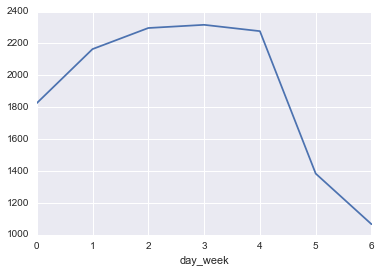

In [217]:
%pylab inline
import seaborn as sns
ridership_by_day.plot()

# Quiz

In [224]:
import numpy as np
import pandas as pd

ridership_df = pd.DataFrame({
    'UNIT': ['R051', 'R079', 'R051', 'R079', 'R051', 'R079', 'R051', 'R079', 'R051'],
    'TIMEn': ['00:00:00', '02:00:00', '04:00:00', '06:00:00', '08:00:00', '10:00:00', '12:00:00', '14:00:00', '16:00:00'],
    'ENTRIESn': [3144312, 8936644, 3144335, 8936658, 3144353, 8936687, 3144424, 8936819, 3144594],
    'EXITSn': [1088151, 13755385,  1088159, 13755393,  1088177, 13755598, 1088231, 13756191,  1088275]
})



In [228]:
def hourly_for_group(entries_and_exits):
    return entries_and_exits - entries_and_exits.shift(1)

In [229]:
# You can't subtract a str from a str
ridership_df.groupby('UNIT')[['ENTRIESn', 'EXITSn']].apply(hourly_for_group)

,ENTRIESn,EXITSn
0,NaN,NaN
1,NaN,NaN
2,23.0,8.0
3,14.0,8.0
4,18.0,18.0
5,29.0,205.0
6,71.0,54.0
7,132.0,593.0
8,170.0,44.0



Working with multiple DataFrames
=================================

## Merge Code


In [233]:
submissions.merge(enrollments, on='account_key', how='left' )
                                                 how='inner'# depends on example

IndentationError: unexpected indent (<ipython-input-233-1c17460b2aba>, line 2)

In [232]:
ls


 Volume in drive C is OS
 Volume Serial Number is DA6E-4B74

 Directory of C:\Users\ElPanda\onedrive\udacity\lesson 3

09/20/2016  10:20 PM    <DIR>          .
09/20/2016  10:20 PM    <DIR>          ..
09/20/2016  08:52 PM    <DIR>          .ipynb_checkpoints
09/20/2016  03:35 PM         9,441,559 nyc_subway_weather.csv
09/07/2016  08:35 PM                 0 py
09/20/2016  03:36 PM                72 Untitled.ipynb
               3 File(s)      9,441,631 bytes
               3 Dir(s)  190,383,104,000 bytes free


# Quiz

In [234]:
import pandas as pd

subway_df = pd.DataFrame({
    'UNIT': ['R003', 'R003', 'R003', 'R003', 'R003', 'R004', 'R004', 'R004',
             'R004', 'R004'],
    'DATEn': ['05-01-11', '05-02-11', '05-03-11', '05-04-11', '05-05-11',
              '05-01-11', '05-02-11', '05-03-11', '05-04-11', '05-05-11'],
    'hour': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    'ENTRIESn': [ 4388333,  4388348,  4389885,  4391507,  4393043, 14656120,
                 14656174, 14660126, 14664247, 14668301],
    'EXITSn': [ 2911002,  2911036,  2912127,  2913223,  2914284, 14451774,
               14451851, 14454734, 14457780, 14460818],
    'latitude': [ 40.689945,  40.689945,  40.689945,  40.689945,  40.689945,
                  40.69132 ,  40.69132 ,  40.69132 ,  40.69132 ,  40.69132 ],
    'longitude': [-73.872564, -73.872564, -73.872564, -73.872564, -73.872564,
                  -73.867135, -73.867135, -73.867135, -73.867135, -73.867135]
})

weather_df = pd.DataFrame({
    'DATEn': ['05-01-11', '05-01-11', '05-02-11', '05-02-11', '05-03-11',
              '05-03-11', '05-04-11', '05-04-11', '05-05-11', '05-05-11'],
    'hour': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    'latitude': [ 40.689945,  40.69132 ,  40.689945,  40.69132 ,  40.689945,
                  40.69132 ,  40.689945,  40.69132 ,  40.689945,  40.69132 ],
    'longitude': [-73.872564, -73.867135, -73.872564, -73.867135, -73.872564,
                  -73.867135, -73.872564, -73.867135, -73.872564, -73.867135],
    'pressurei': [ 30.24,  30.24,  30.32,  30.32,  30.14,  30.14,  29.98,  29.98,
                   30.01,  30.01],
    'fog': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    'rain': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    'tempi': [ 52. ,  52. ,  48.9,  48.9,  54. ,  54. ,  57.2,  57.2,  48.9,  48.9],
    'wspdi': [  8.1,   8.1,   6.9,   6.9,   3.5,   3.5,  15. ,  15. ,  15. ,  15. ]
})



In [235]:
subway_df.head()

#HOw do i match up the rows? DATe, hour, latitiute

,DATEn,ENTRIESn,EXITSn,UNIT,hour,latitude,longitude
0,05-01-11,4388333,2911002,R003,0,40.689945,-73.872564
1,05-02-11,4388348,2911036,R003,0,40.689945,-73.872564
2,05-03-11,4389885,2912127,R003,0,40.689945,-73.872564
3,05-04-11,4391507,2913223,R003,0,40.689945,-73.872564
4,05-05-11,4393043,2914284,R003,0,40.689945,-73.872564


In [236]:
weather_df.head()

,DATEn,fog,hour,latitude,longitude,pressurei,rain,tempi,wspdi
0,05-01-11,0,0,40.689945,-73.872564,30.24,0,52.0,8.1
1,05-01-11,0,0,40.691320,-73.867135,30.24,0,52.0,8.1
2,05-02-11,0,0,40.689945,-73.872564,30.32,0,48.9,6.9
3,05-02-11,0,0,40.691320,-73.867135,30.32,0,48.9,6.9
4,05-03-11,0,0,40.689945,-73.872564,30.14,0,54.0,3.5


In [244]:
subway_df.merge(weather_df,
              on=['DATEn', 'hour', 'latitude', 'longitude'],
               how='inner')

,DATEn,ENTRIESn,EXITSn,UNIT,hour,latitude,longitude,fog,pressurei,rain,tempi,wspdi
0,05-01-11,4388333,2911002,R003,0,40.689945,-73.872564,0,30.24,0,52.0,8.1
1,05-02-11,4388348,2911036,R003,0,40.689945,-73.872564,0,30.32,0,48.9,6.9
2,05-03-11,4389885,2912127,R003,0,40.689945,-73.872564,0,30.14,0,54.0,3.5
3,05-04-11,4391507,2913223,R003,0,40.689945,-73.872564,0,29.98,0,57.2,15.0
4,05-05-11,4393043,2914284,R003,0,40.689945,-73.872564,0,30.01,0,48.9,15.0
5,05-01-11,14656120,14451774,R004,0,40.691320,-73.867135,0,30.24,0,52.0,8.1
6,05-02-11,14656174,14451851,R004,0,40.691320,-73.867135,0,30.32,0,48.9,6.9
7,05-03-11,14660126,14454734,R004,0,40.691320,-73.867135,0,30.14,0,54.0,3.5
8,05-04-11,14664247,14457780,R004,0,40.691320,-73.867135,0,29.98,0,57.2,15.0
9,05-05-11,14668301,14460818,R004,0,40.691320,-73.867135,0,30.01,0,48.9,15.0


In [247]:
import pandas as pd

df = pd.read_csv('nyc_subway_weather.csv')

In [254]:
data_by_location = df.groupby(['latitude', 'longitude'],
                                 as_index=False).mean()

In [255]:
data_by_location.head('latitude')

TypeError: cannot do slice indexing on <class 'pandas.indexes.numeric.Int64Index'> with these indexers [latitude] of <class 'str'>